## 1. Data Integration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
customers = pd.read_sas("a2z_insurance.sas7bdat")

In [3]:
customers.set_index('CustID', inplace = True)

In [4]:
customers.head()

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
1.0,1985.0,1982.0,b'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
2.0,1981.0,1995.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
3.0,1991.0,1970.0,b'1 - Basic',2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
4.0,1990.0,1981.0,b'3 - BSc/MSc',1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
5.0,1986.0,1973.0,b'3 - BSc/MSc',1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45


## 2. Data Exploration

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10296 entries, 1.0 to 10296.0
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FirstPolYear   10266 non-null  float64
 1   BirthYear      10279 non-null  float64
 2   EducDeg        10279 non-null  object 
 3   MonthSal       10260 non-null  float64
 4   GeoLivArea     10295 non-null  float64
 5   Children       10275 non-null  float64
 6   CustMonVal     10296 non-null  float64
 7   ClaimsRate     10296 non-null  float64
 8   PremMotor      10262 non-null  float64
 9   PremHousehold  10296 non-null  float64
 10  PremHealth     10253 non-null  float64
 11  PremLife       10192 non-null  float64
 12  PremWork       10210 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.1+ MB


In [9]:
customers.describe().T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
FirstPolYear,10266.0,NaN,NaN,NaN,1991.062634,511.267913,1974.0,1980.0,1986.0,1992.0,53784.0
BirthYear,10279.0,NaN,NaN,NaN,1968.007783,19.709476,1028.0,1953.0,1968.0,1983.0,2001.0
MonthSal,10260.0,NaN,NaN,NaN,2506.667057,1157.449634,333.0,1706.0,2501.5,3290.25,55215.0
GeoLivArea,10295.0,NaN,NaN,NaN,2.709859,1.266291,1.0,1.0,3.0,4.0,4.0
Children,10275,2,True,7262,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustMonVal,10296.0,NaN,NaN,NaN,177.892605,1945.811505,-165680.42,-9.44,186.87,399.7775,11875.89
ClaimsRate,10296.0,NaN,NaN,NaN,0.742772,2.916964,0.0,0.39,0.72,0.98,256.2
PremMotor,10262.0,NaN,NaN,NaN,300.470252,211.914997,-4.11,190.59,298.61,408.3,11604.42
PremHousehold,10296.0,NaN,NaN,NaN,210.431192,352.595984,-75.0,49.45,132.8,290.05,25048.8
PremHealth,10253.0,NaN,NaN,NaN,171.580833,296.405976,-2.11,111.8,162.81,219.82,28272.0


In [10]:
customers.isnull().sum()

FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [11]:
customers[customers.duplicated(keep=False)]

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
2076.0,1977.0,1974.0,b'2 - High School',2204.0,4.0,True,-22.11,1.00,214.93,88.90,266.94,39.23,42.12
2100.0,1987.0,1987.0,b'2 - High School',1912.0,4.0,True,290.61,0.58,202.37,177.25,306.39,63.90,-0.11
3507.0,1986.0,1952.0,b'2 - High School',3900.0,4.0,False,-119.35,1.10,163.03,481.75,224.82,94.35,18.56
8014.0,1987.0,1987.0,b'2 - High School',1912.0,4.0,True,290.61,0.58,202.37,177.25,306.39,63.90,-0.11
8122.0,1977.0,1974.0,b'2 - High School',2204.0,4.0,True,-22.11,1.00,214.93,88.90,266.94,39.23,42.12
9554.0,1986.0,1952.0,b'2 - High School',3900.0,4.0,False,-119.35,1.10,163.03,481.75,224.82,94.35,18.56


We identified the duplicated rows presented above, however, we did not consider this a mistake, since it can just be a coincidence, and kept the records.

In [14]:
import matplotlib.pyplot as plt
from math import ceil

In [22]:
non_metric_features = ["EducDeg", "GeoLivArea", "Children"]
metric_features = customers.columns.drop(non_metric_features).to_list()

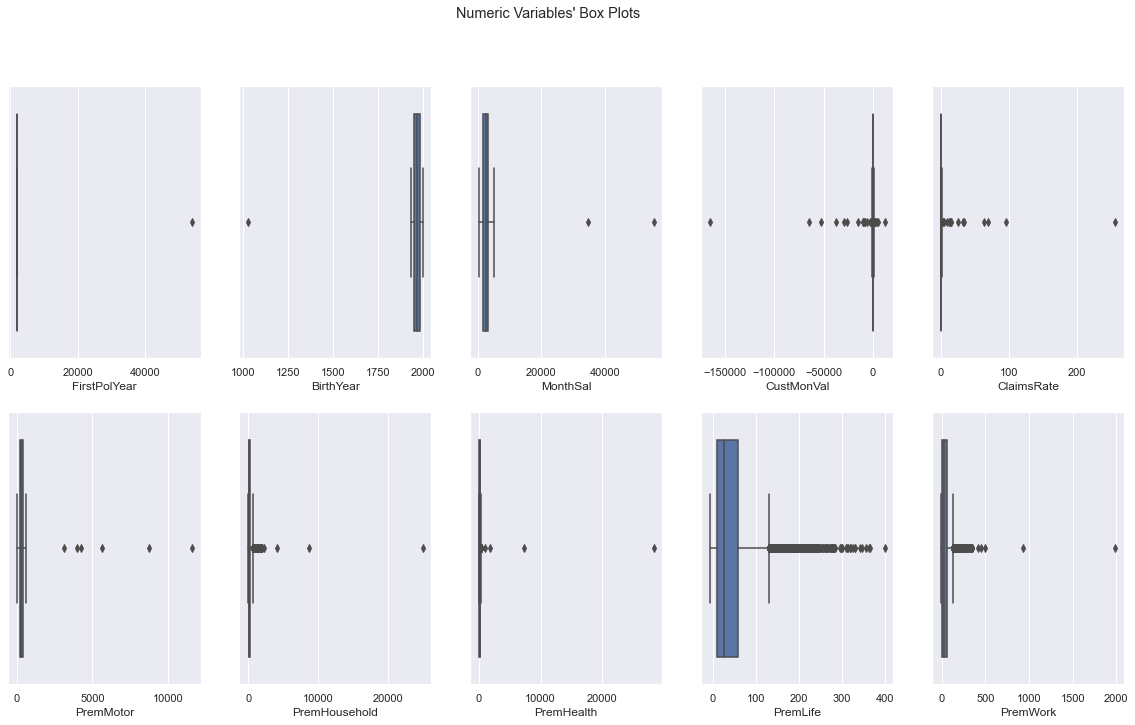

In [23]:
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=customers[feat], ax=ax)

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

In [13]:
customers['EducDeg'].value_counts(dropna=False)

b'3 - BSc/MSc'        4799
b'2 - High School'    3510
b'1 - Basic'          1272
b'4 - PhD'             698
NaN                     17
Name: EducDeg, dtype: int64

## 3. Data Preprocessing

### 3.1 Format Data

In [7]:
# fix wrong dtypes
customers.Children = customers.Children.astype("boolean")

#### 3.1.1 Encoding

In [ ]:
customers['EducDeg'].replace(to_replace = "b'4 - PhD'",value = 3, inplace = True)
customers['EducDeg'].replace(to_replace = "b'3 - BSc/MSc'",value = 2, inplace = True)
customers['EducDeg'].replace(to_replace = "b'2 - High School'",value = 1, inplace = True)
customers['EducDeg'].replace(to_replace = "b'1 - Basic'",value = 0, inplace = True)
customers['EducDeg'].value_counts(dropna=False)

### 3.2 Missing Values

In [24]:
customers.median(numeric_only=True)

FirstPolYear     1986.00
BirthYear        1968.00
MonthSal         2501.50
GeoLivArea          3.00
Children            1.00
CustMonVal        186.87
ClaimsRate          0.72
PremMotor         298.61
PremHousehold     132.80
PremHealth        162.81
PremLife           25.56
PremWork           25.67
dtype: float64

In [25]:
modes = customers[non_metric_features].mode().loc[0]

In [26]:
modes

EducDeg       b'3 - BSc/MSc'
GeoLivArea               4.0
Children                True
Name: 0, dtype: object

In [27]:
customers.fillna(modes, inplace=True)
customers.isna().sum()  # checking how many NaNs we still have

FirstPolYear      30
BirthYear         17
EducDeg            0
MonthSal          36
GeoLivArea         0
Children           0
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [28]:
from sklearn.impute import KNNImputer

In [33]:
imputer.fit(customers[metric_features].values.reshape(-1, 1))
customers[metric_features] = imputer.transform(customers[metric_features].values.reshape(-1, 1))

ValueError: Columns must be same length as key